In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True)
df.columns = list(map(str, df.columns))

df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,Pluvial,Permanent,199,Siliceous,0.001,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,0


1. Run a simple linear regression relating the species richness with each one of the continuous
environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch,
prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the
variables requires to be transformed and apply the appropriate transformation. Compute the
regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.

In [4]:
df['Richness'] = df.loc[:, 'Abramis brama':].sum(axis=1)

From what Professor said in class, only Actual_river_slope needs to be transformed. The rest are close enough to Normal that they can be used as they are

Lambda value: -0.030714347822139075
0       0.000999
1       2.561283
2       2.259391
3       2.143838
4       2.447548
          ...   
5006         NaN
5007         NaN
5008         NaN
5009         NaN
5010         NaN
Name: Transformed_river_slope, Length: 5011, dtype: float64


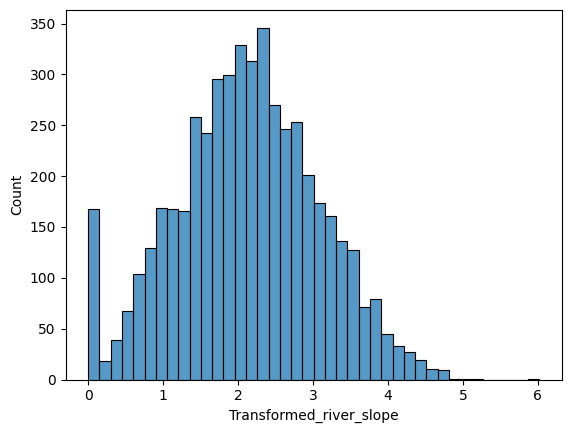

In [5]:
# Transform Actual_river_slope
trans_data, lambda_value = sts.yeojohnson(df['Actual_river_slope'].dropna())
df['Transformed_river_slope'] = pd.Series(trans_data)
print(f"Lambda value: {lambda_value}")
print(df['Transformed_river_slope'])
sns.histplot(df['Transformed_river_slope'])
plt.show()

Regression of Richness as a function of Altitude
                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     577.6
Date:                Wed, 08 May 2024   Prob (F-statistic):          6.83e-121
Time:                        14:41:11   Log-Likelihood:                -12135.
No. Observations:                5011   AIC:                         2.427e+04
Df Residuals:                    5009   BIC:                         2.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

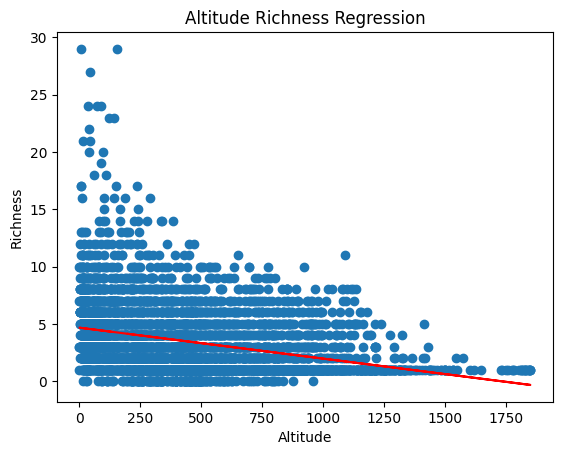

--------------------------------------------------------------------------------
Regression of Richness as a function of Transformed_river_slope
                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     162.6
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.13e-36
Time:                        14:41:12   Log-Likelihood:                -12241.
No. Observations:                4975   AIC:                         2.449e+04
Df Residuals:                    4973   BIC:                         2.450e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|

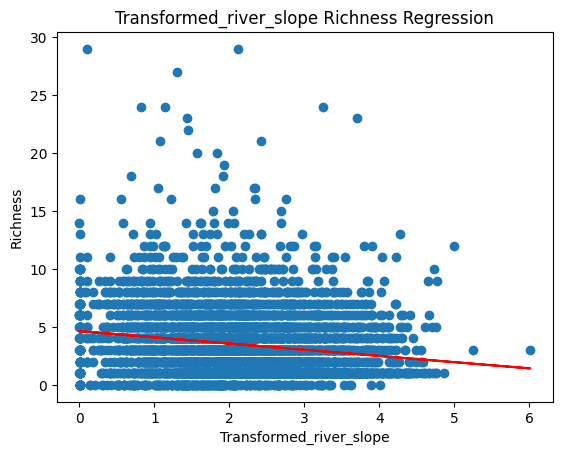

--------------------------------------------------------------------------------
Regression of Richness as a function of Elevation_mean_catch
                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     281.7
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.71e-61
Time:                        14:41:12   Log-Likelihood:                -11808.
No. Observations:                4841   AIC:                         2.362e+04
Df Residuals:                    4839   BIC:                         2.363e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|    

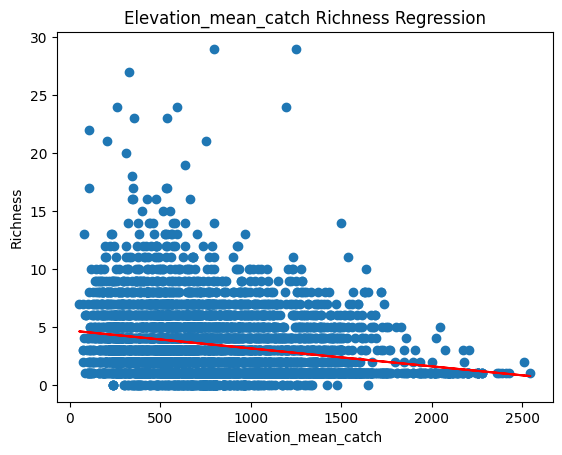

--------------------------------------------------------------------------------
Regression of Richness as a function of prec_ann_catch
                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 08 May 2024   Prob (F-statistic):           4.65e-26
Time:                        14:41:12   Log-Likelihood:                -11889.
No. Observations:                4841   AIC:                         2.378e+04
Df Residuals:                    4839   BIC:                         2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025    

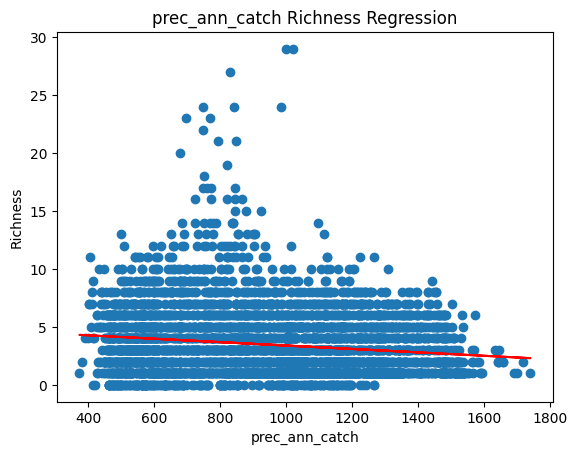

--------------------------------------------------------------------------------
Regression of Richness as a function of temp_ann
                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     510.9
Date:                Wed, 08 May 2024   Prob (F-statistic):          1.27e-107
Time:                        14:41:12   Log-Likelihood:                -11702.
No. Observations:                4841   AIC:                         2.341e+04
Df Residuals:                    4839   BIC:                         2.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

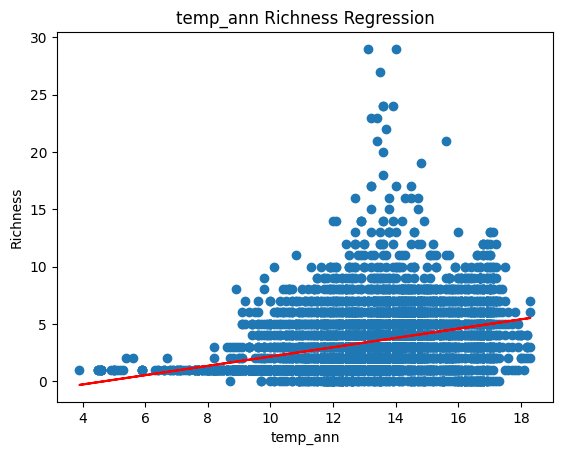

--------------------------------------------------------------------------------
Regression of Richness as a function of temp_jan
                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     211.2
Date:                Wed, 08 May 2024   Prob (F-statistic):           7.36e-47
Time:                        14:41:12   Log-Likelihood:                -11842.
No. Observations:                4841   AIC:                         2.369e+04
Df Residuals:                    4839   BIC:                         2.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

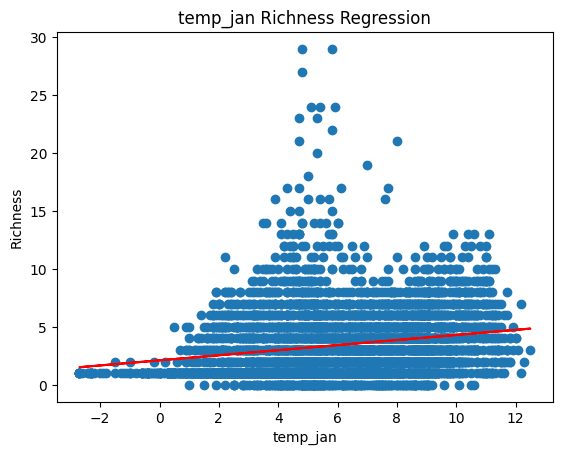

--------------------------------------------------------------------------------
Regression of Richness as a function of temp_jul
                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     496.4
Date:                Wed, 08 May 2024   Prob (F-statistic):          8.95e-105
Time:                        14:41:12   Log-Likelihood:                -11709.
No. Observations:                4841   AIC:                         2.342e+04
Df Residuals:                    4839   BIC:                         2.343e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

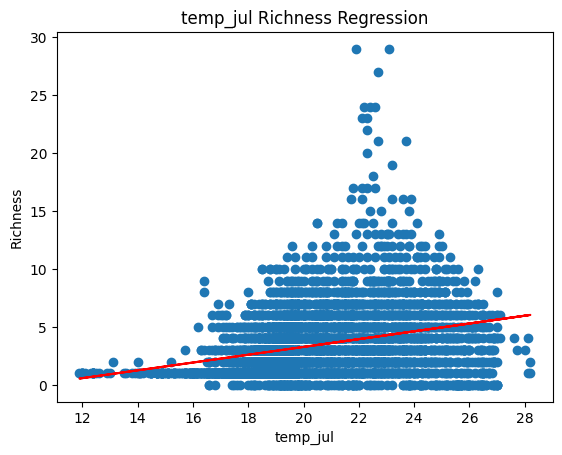

--------------------------------------------------------------------------------


In [6]:
def myfunc(x):
    return intercept + slope * x

envi_vars = ['Altitude', 'Transformed_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
for var in envi_vars:
    df2 = df[["Richness", var]].dropna()
    x=df2[var]
    y=df2["Richness"]

    # Execute a method that returns some important key values of Linear Regression:
    slope, intercept, r, p, std_err = sts.linregress(x, y)
    mymodel = list(map(myfunc, x)) # apply function to each x value

    print(f'Regression of Richness as a function of {var}')
    plt.title(f'{var} Richness Regression')
    plt.xlabel(f'{var}')
    plt.ylabel("Richness")
    plt.scatter(x, y)
    plt.plot(x, mymodel, color="red")

    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x)
    print_model = model.summary()
    print(print_model)
    
    plt.show()
    print('-' * 80)

2. Now try to run a multiple linear regression with the same data and check the differences between the
previous univariate regression coefficients and the new coefficients. Plot the partial dependence plots
to compare responses with the previous single effects.

                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     151.5
Date:                Wed, 08 May 2024   Prob (F-statistic):          9.23e-203
Time:                        14:41:12   Log-Likelihood:                -11377.
No. Observations:                4805   AIC:                         2.277e+04
Df Residuals:                    4797   BIC:                         2.282e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

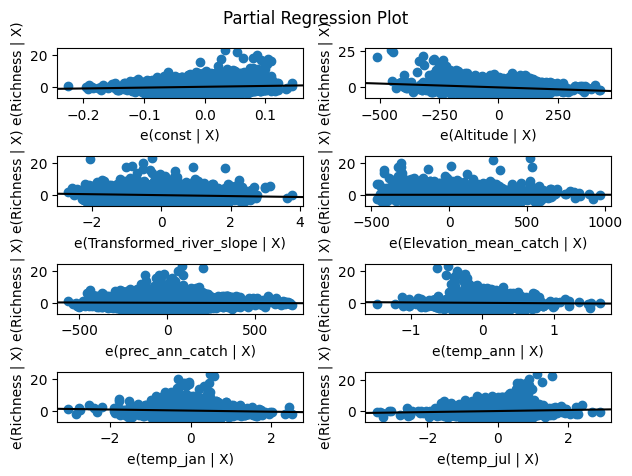

In [7]:
df3 = df[[*envi_vars, 'Richness']].dropna()

x = df3[envi_vars]
y = df3['Richness']

x2 = sm.add_constant(x)
model = sm.OLS(y, x2).fit()
print(model.summary())

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

3. Check the multicolinearity among the predictor variables and run a second more parsimonious
regression model. Check how the coefficients have changed.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(df[envi_vars].dropna())

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame(index=df_with_const.columns, columns=df_with_const.columns)

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF results
print(vif_data)

                   feature         VIF
0                    const  456.452698
1                 Altitude    8.384129
2  Transformed_river_slope    1.094210
3     Elevation_mean_catch    5.246237
4           prec_ann_catch    2.437334
5                 temp_ann   74.593838
6                 temp_jan   29.057469
7                 temp_jul   21.477075


Based on VIF, looks like Altitude, Elevation_mean_catch, temp_ann, temp_jan, and temp_jul all have high correlations with other variables. Using a correlation matrix to better identify which variables are correlated with each other

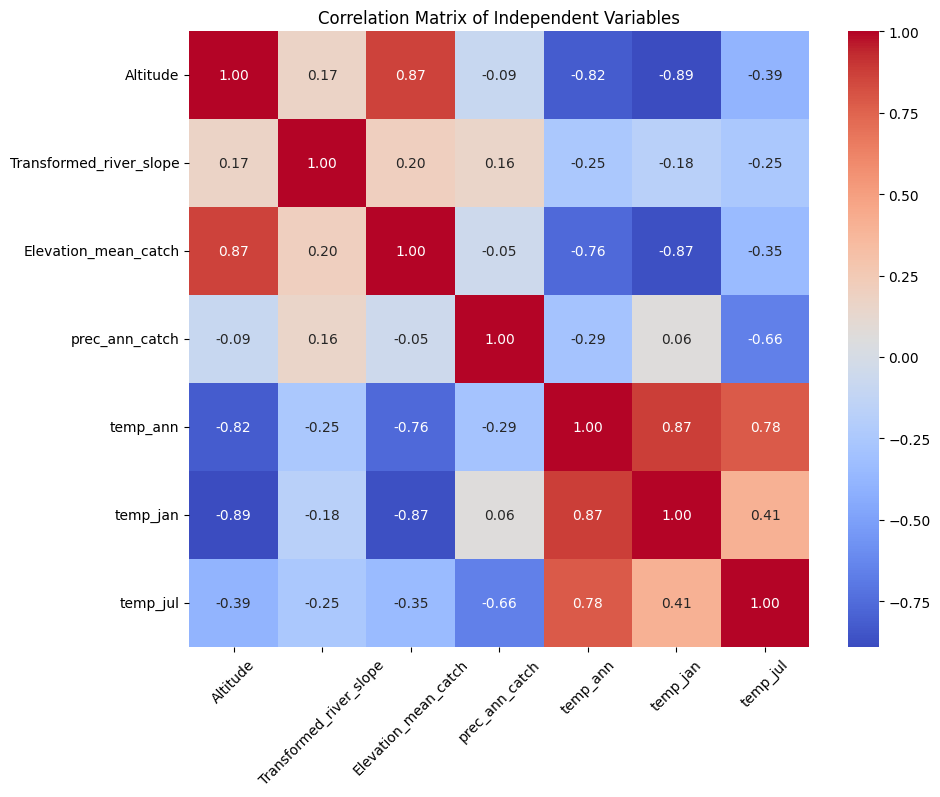

In [9]:
# Compute the correlation matrix
corr_matrix = df[envi_vars].dropna().corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Matrix of Independent Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [10]:
# Removing the temp_ann
envi_vars_mulcolrm = ['Altitude', 'Transformed_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_jan', 'temp_jul']

df_with_const = add_constant(df[envi_vars_mulcolrm].dropna())

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame(index=df_with_const.columns, columns=df_with_const.columns)

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF results
print(vif_data)

                   feature         VIF
0                    const  378.755571
1                 Altitude    6.084685
2  Transformed_river_slope    1.090059
3     Elevation_mean_catch    5.105950
4           prec_ann_catch    2.435607
5                 temp_jan    6.386136
6                 temp_jul    2.953788


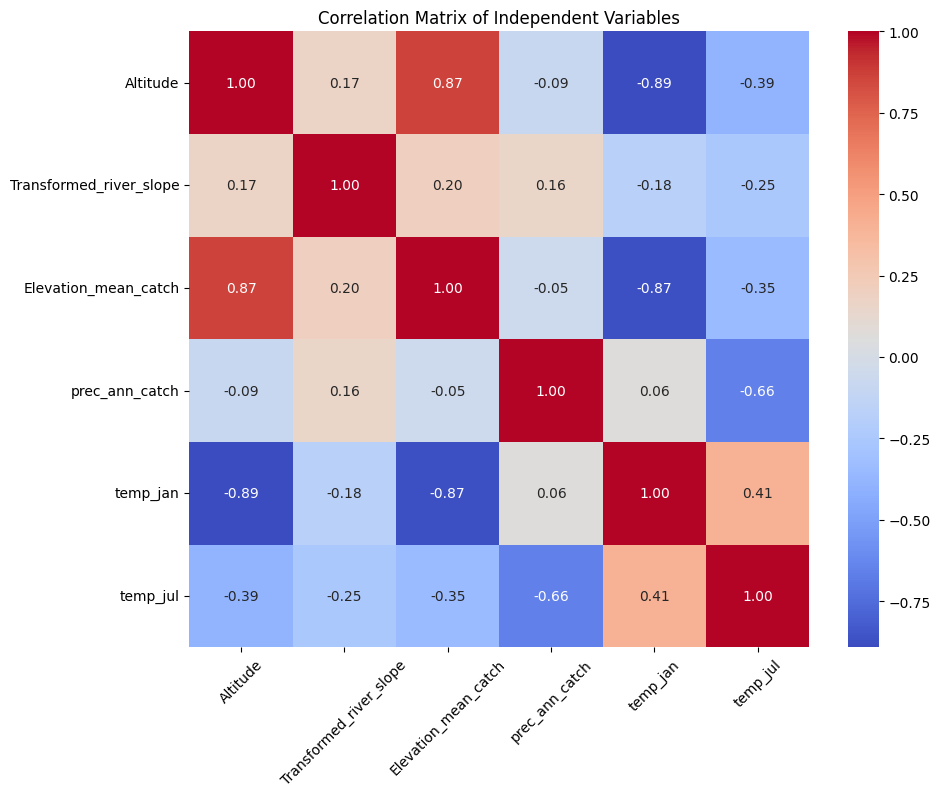

In [11]:
# Checking against correlation matrix
corr_matrix = df[envi_vars_mulcolrm].dropna().corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Matrix of Independent Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [12]:
# Also taking out Altitude and temp_jan
envi_vars_mulcolrm = ['Transformed_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_jul']

df_with_const = add_constant(df[envi_vars_mulcolrm].dropna())

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame(index=df_with_const.columns, columns=df_with_const.columns)

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF results
print(vif_data)


                   feature         VIF
0                    const  308.594699
1  Transformed_river_slope    1.087949
2     Elevation_mean_catch    1.379372
3           prec_ann_catch    2.121554
4                 temp_jul    2.437916


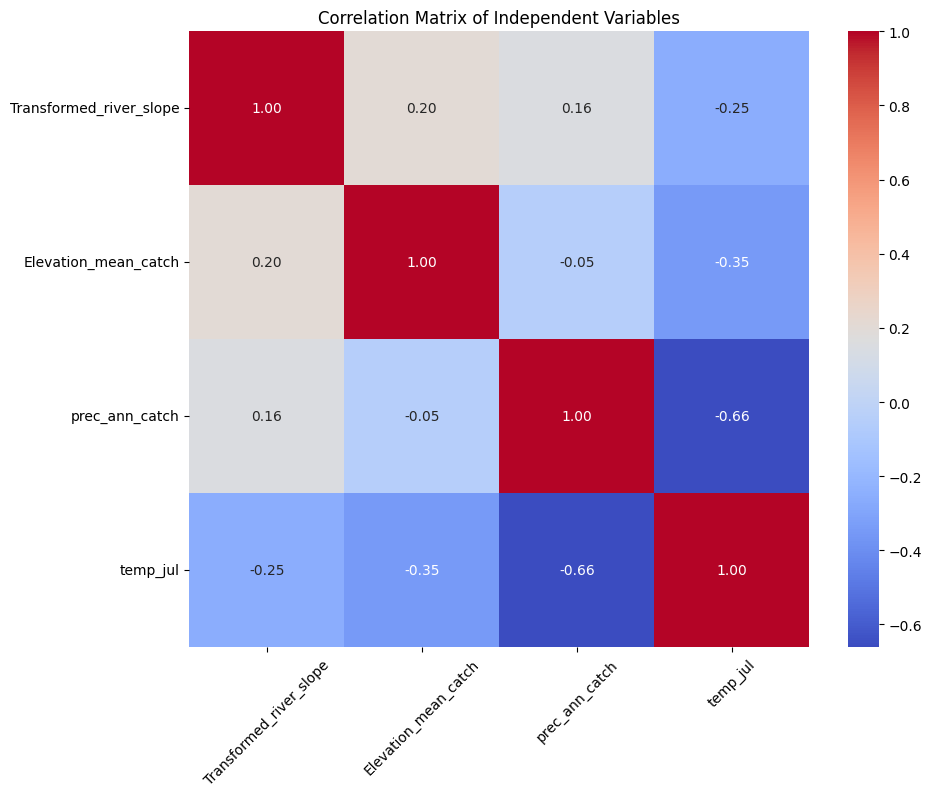

In [13]:
# Checking against correlation matrix
corr_matrix = df[envi_vars_mulcolrm].dropna().corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Matrix of Independent Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

VIF and Correlations all seem to be in acceptable levels now

                            OLS Regression Results                            
Dep. Variable:               Richness   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     163.0
Date:                Wed, 08 May 2024   Prob (F-statistic):          5.11e-131
Time:                        14:41:14   Log-Likelihood:                -11551.
No. Observations:                4805   AIC:                         2.311e+04
Df Residuals:                    4800   BIC:                         2.314e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

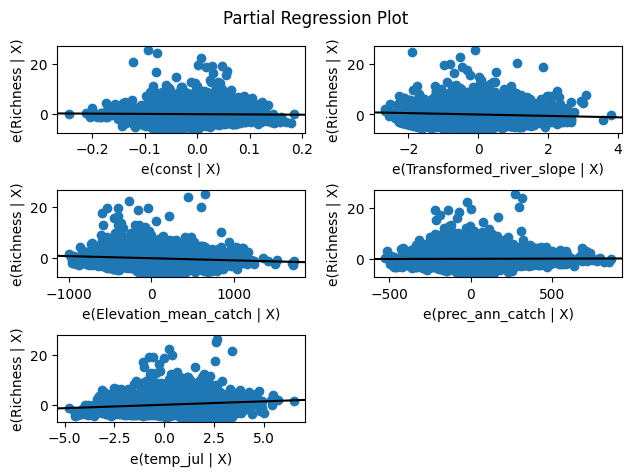

In [14]:
df4 = df[[*envi_vars_mulcolrm, 'Richness']].dropna()

x = df4[envi_vars_mulcolrm]
y = df4['Richness']

x2 = sm.add_constant(x)
model = sm.OLS(y, x2).fit()
print(model.summary())

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)